In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
import numpy as np

Plot DALYs, Prev, Indec by age group for 2021


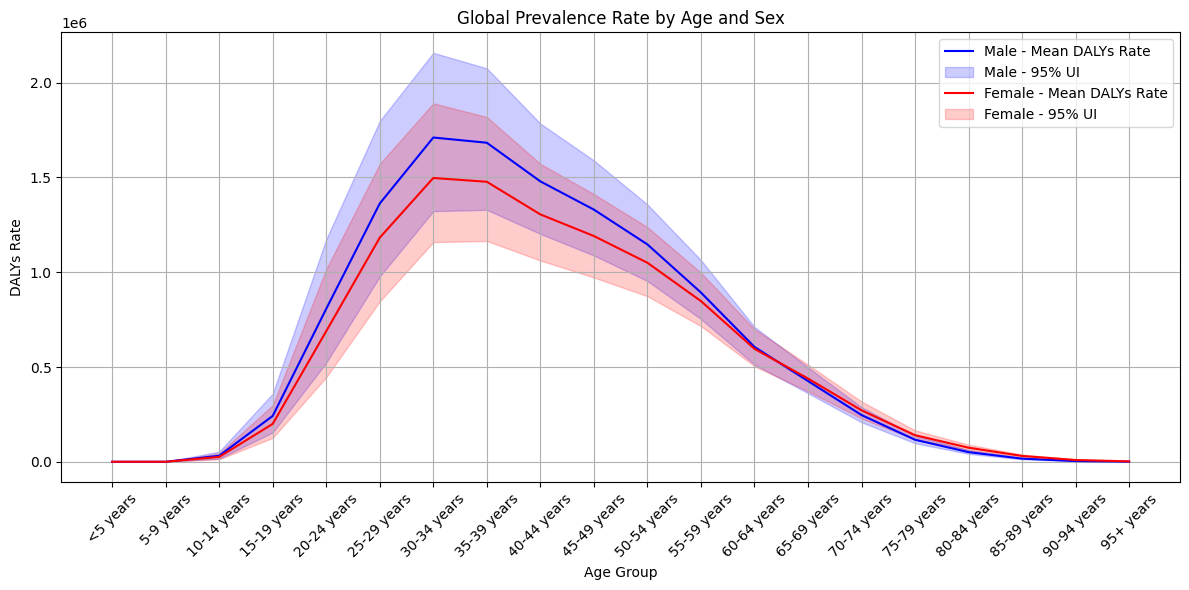

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DALYs data
file_path = 'new_data_important/Prevalence/Prevalence_countries_2021.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Filter out rows where age_id equals 22
df = df[df['age_id'] != 22]

# Sort by age_id in descending order
df = df.sort_values(by='age_id', ascending=True)

# Filter for global data
global_dalys = df[df['location_name'] == 'Global']

# Separate data by sex
male_data = global_dalys[global_dalys['sex_id'] == 1]
female_data = global_dalys[global_dalys['sex_id'] == 2]
both_data = global_dalys[global_dalys['sex_id'] == 3]

# Plot the data
plt.figure(figsize=(12, 6))

# Male
plt.plot(male_data['age_name'], male_data['val'], label='Male - Mean DALYs Rate', color='blue')
plt.fill_between(male_data['age_name'], male_data['lower'], male_data['upper'], color='blue', alpha=0.2, label='Male - 95% UI')

# Female
plt.plot(female_data['age_name'], female_data['val'], label='Female - Mean DALYs Rate', color='red')
plt.fill_between(female_data['age_name'], female_data['lower'], female_data['upper'], color='red', alpha=0.2, label='Female - 95% UI')

# Both
# plt.plot(both_data['age_name'], both_data['val'], label='Both - Mean DALYs Rate', color='green')
# plt.fill_between(both_data['age_name'], both_data['lower'], both_data['upper'], color='green', alpha=0.2, label='Both - 95% UI')

# Add labels, title, and legend
plt.title('Global Prevalence Rate by Age and Sex')
plt.xlabel('Age Group')
plt.ylabel('DALYs Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
file_path = 'new_data_important/data_1990_2021.csv'

In [9]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 22]

# Initialize a dictionary to store forecasts
forecasts = {}

# Loop through each sex_id
for sex_id in df['sex_id'].unique():
    # Filter data for the current sex_id
    sex_data = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
    sex_data = sex_data.set_index('year')
    print(sex_data)
    # Fit the ARIMA model
    model = ARIMA(sex_data['val'], order=(1, 1, 1))  # Adjust order as needed
    model_fit = model.fit()

    # Forecast up to 2050
    forecast_years = 2050 - sex_data.index.max()
    print(forecast_years)
    forecast = model_fit.forecast(steps=forecast_years)

    # Store the forecast
    forecasts[sex_id] = forecast

    # Plot the original data and forecast
    plt.figure(figsize=(10, 6))
    plt.plot(sex_data.index, sex_data['val'], label='Observed')
    plt.plot(range(sex_data.index.max() + 1, 2051), forecast, label='Forecast', linestyle='--')
    plt.title(f'Forecast for sex_id {sex_id}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Combine forecasts into a DataFrame
forecast_df = pd.DataFrame({
    'year': range(df['year'].max() + 1, 2051),
    **{f'sex_id_{sex_id}': forecasts[sex_id] for sex_id in forecasts}
})

# Save the forecast to a CSV file
forecast_df.to_csv('new_data_important/forecast_1990_2050.csv', index=False)
print("Forecast saved to 'new_data_important/forecast_1990_2050.csv'.")

         val
year        
1990  187.30
1991  187.36
1992  187.44
1993  187.49
1994  187.56
1996  187.46
1995  187.58
1997  187.37
1998  187.20
1999  187.07
2000  187.04
2001  187.01
2002  187.03
2003  187.12
2004  187.21
2005  187.34
2006  187.61
2007  188.09
2008  188.66
2010  189.37
2011  189.46
2009  189.09
2013  189.60
2012  189.57
2014  189.59
2015  189.56
2016  189.39
2017  189.25
2019  189.16
2018  189.15
2020  189.41
2021  188.96
29


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: Prediction must have `end` after `start`.

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

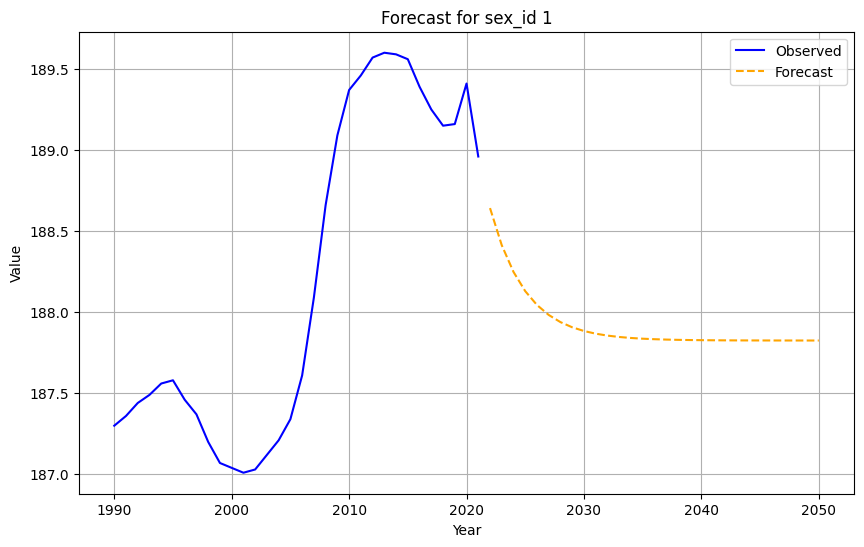

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

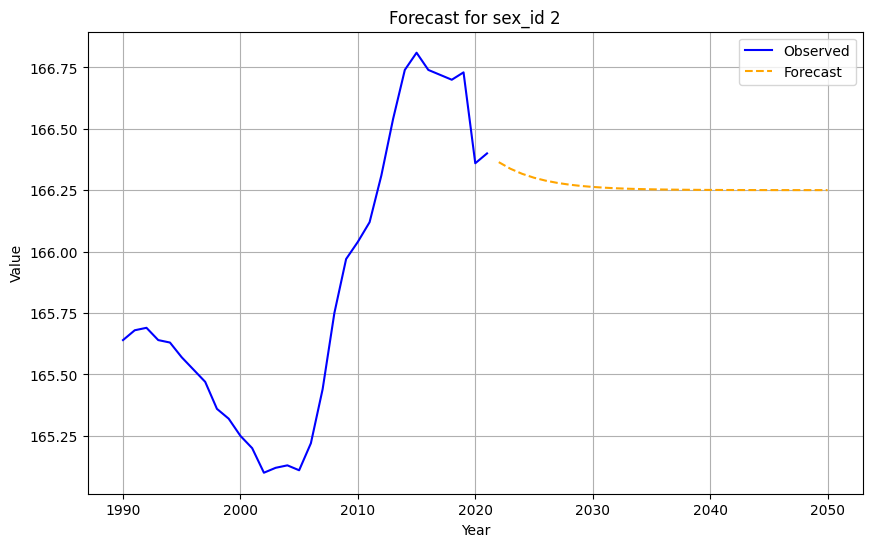

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

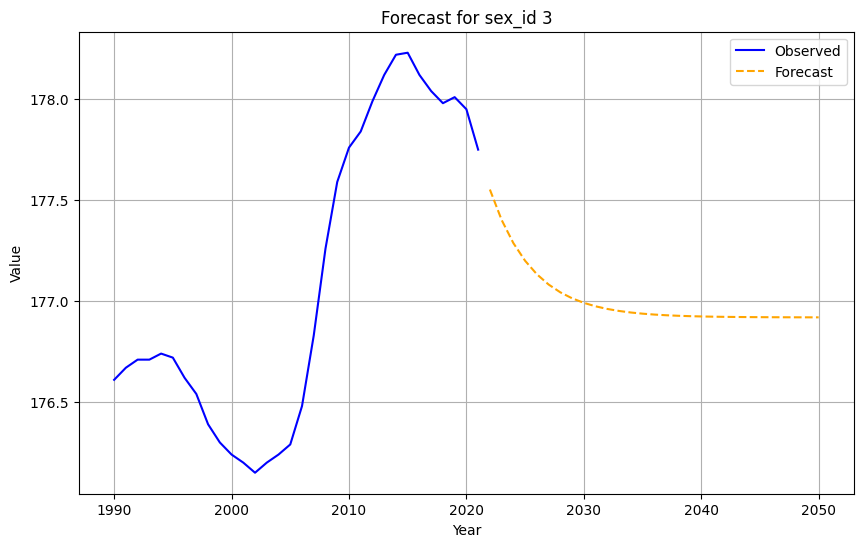

Forecast saved to 'new_data/forecast_1990_2050.csv'.


In [33]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 22]

# Initialize a dictionary to store forecasts
forecasts = {}

# Loop through each sex_id
for sex_id in df['sex_id'].unique():
    # Filter data for the current sex_id
    sex_data = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
    sex_data = sex_data.sort_values(by='year')
    sex_data = sex_data.set_index('year')

    # Fit the ARIMA model
    model = ARIMA(sex_data['val'], order=(1, 1, 1))  # Adjust order as needed
    model_fit = model.fit()

    # Forecast up to 2050
    forecast_years = range(sex_data.index.max() + 1, 2051)
    forecast = model_fit.forecast(steps=len(forecast_years))

    # Convert forecast to a pandas Series with the correct index
    forecasts[sex_id] = pd.Series(forecast, index=forecast_years)

    # Plot the original data and forecast
    plt.figure(figsize=(10, 6))
    plt.plot(sex_data.index, sex_data['val'], label='Observed', color='blue')
    plt.plot(forecast_years, forecast, label='Forecast', color='orange', linestyle='--')
    #plt.ylim(0, 200)  # Ensure the y-axis starts from 0
    plt.title(f'Forecast for sex_id {sex_id}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Combine forecasts into a DataFrame
forecast_df = pd.DataFrame(forecasts)
forecast_df.index.name = 'year'

# Save the forecast to a CSV file
forecast_df.to_csv('new_data_important/forecast_1990_2050.csv')
print("Forecast saved to 'new_data_important/forecast_1990_2050.csv'.")

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No s

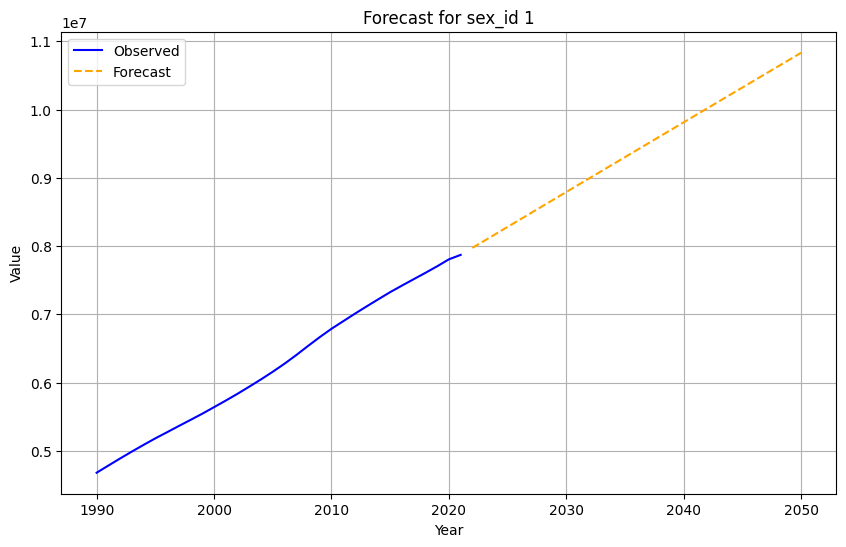

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No s

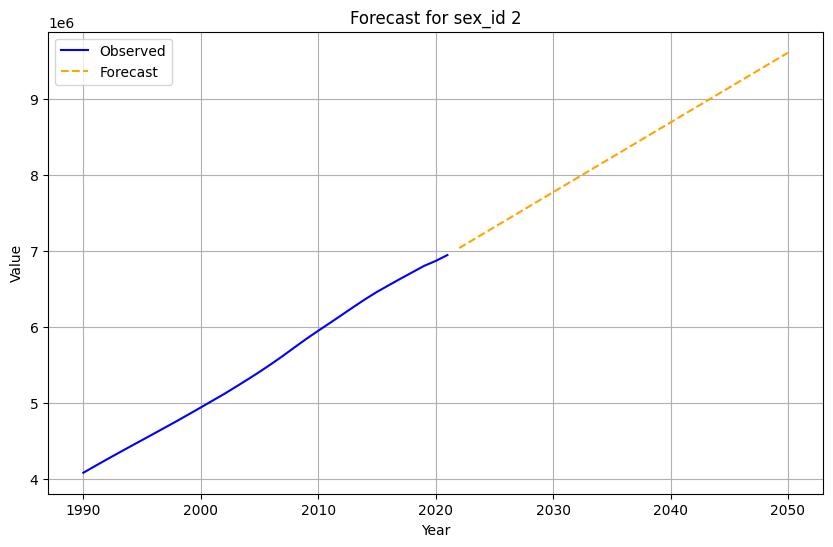

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No s

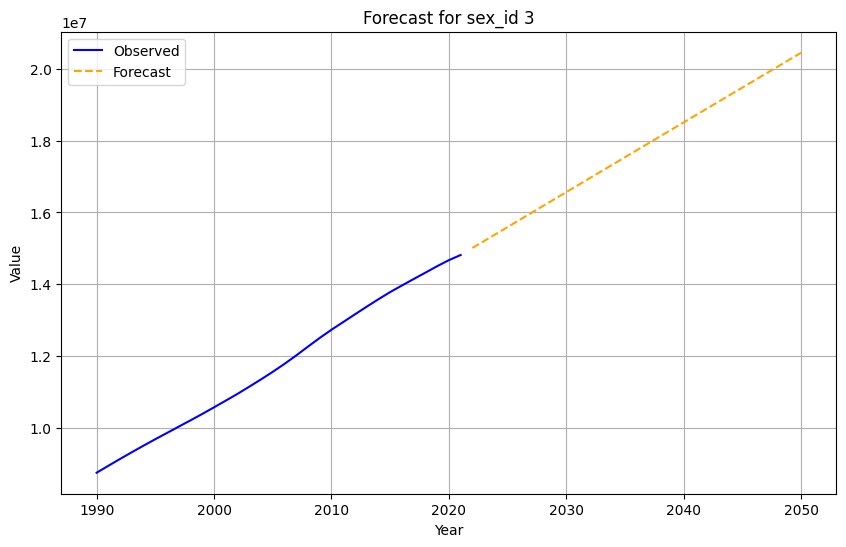

Forecast saved to 'new_data/forecast_1990_2050.csv'.


In [31]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]

# Initialize a dictionary to store forecasts
forecasts = {}

# Loop through each sex_id
for sex_id in df['sex_id'].unique():
    # Filter data for the current sex_id
    sex_data = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
    sex_data = sex_data.sort_values(by='year')

    sex_data = sex_data.set_index('year')

    # Fit the ARIMA model
    model = ARIMA(sex_data['val'], order=(1, 1, 1))  # Adjust order as needed
    model_fit = model.fit()

    # Forecast up to 2050
    forecast_years = range(sex_data.index.max() + 1, 2051)
    forecast = model_fit.forecast(steps=len(forecast_years))

    # Convert forecast to a pandas Series with the correct index
    forecasts[sex_id] = pd.Series(forecast, index=forecast_years)

    # Plot the original data and forecast
    plt.figure(figsize=(10, 6))
    plt.plot(sex_data.index, sex_data['val'], label='Observed', color='blue')
    plt.plot(forecast_years, forecast, label='Forecast', color='orange', linestyle='--')
    #plt.ylim(0, 200)  # Ensure the y-axis starts from 0
    plt.title(f'Forecast for sex_id {sex_id}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Combine forecasts into a DataFrame
forecast_df = pd.DataFrame(forecasts)
forecast_df.index.name = 'year'

# Save the forecast to a CSV file
forecast_df.to_csv('new_data_important/forecast_1990_2050.csv')
print("Forecast saved to 'new_data_important/forecast_1990_2050.csv'.")

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No s

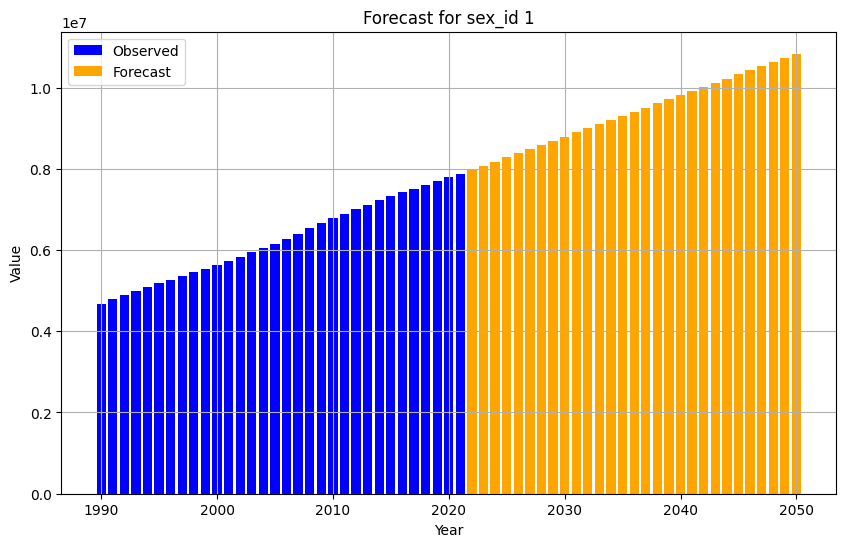

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No s

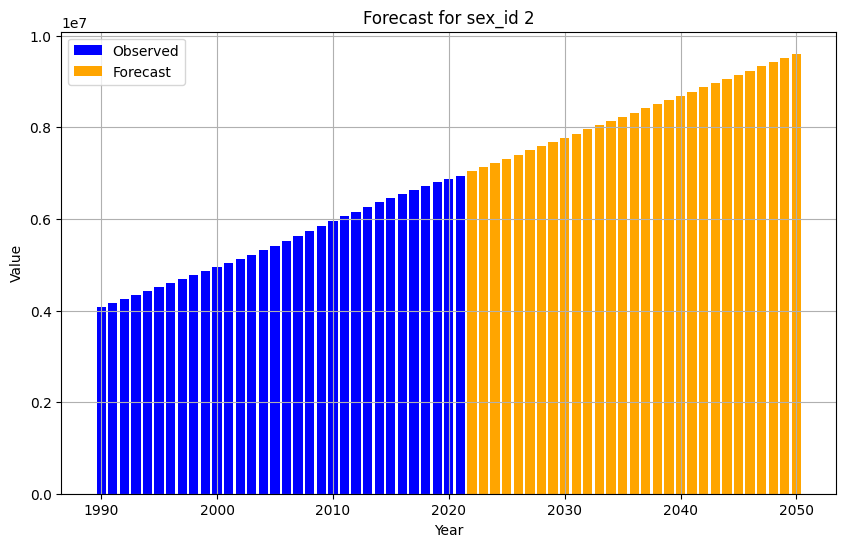

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No s

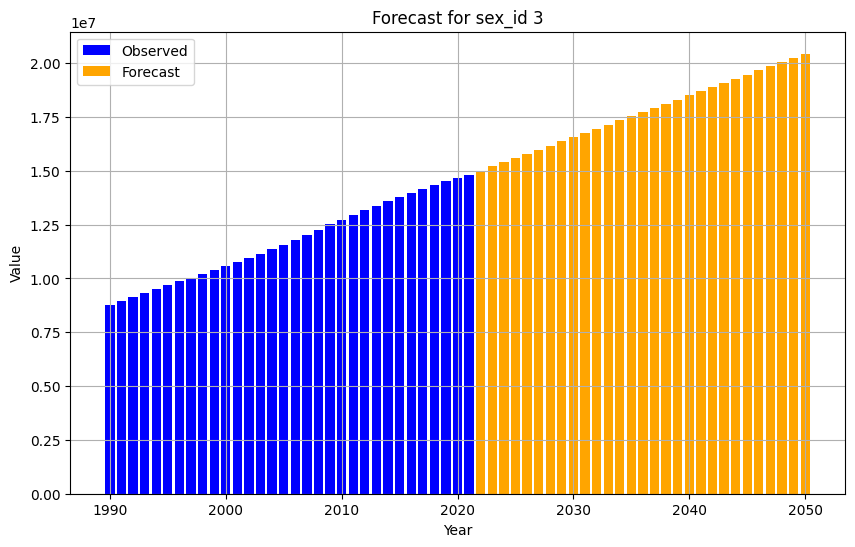

Forecast saved to 'new_data/forecast_1990_2050.csv'.


In [28]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]

# Initialize a dictionary to store forecasts
forecasts = {}

# Loop through each sex_id
for sex_id in df['sex_id'].unique():
    # Filter data for the current sex_id
    sex_data = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
    sex_data = sex_data.sort_values(by='year')

    sex_data = sex_data.set_index('year')

    # Fit the ARIMA model
    model = ARIMA(sex_data['val'], order=(1, 1, 1))  # Adjust order as needed
    model_fit = model.fit()

    # Forecast up to 2050
    forecast_years = range(sex_data.index.max() + 1, 2051)
    forecast = model_fit.forecast(steps=len(forecast_years))

    # Convert forecast to a pandas Series with the correct index
    forecasts[sex_id] = pd.Series(forecast, index=forecast_years)

    # Plot the original data and forecast
    plt.figure(figsize=(10, 6))
    plt.bar(sex_data.index, sex_data['val'], label='Observed', color='blue')
    plt.bar(forecast_years, forecast, label='Forecast', color='orange', linestyle='--')
    #plt.ylim(0, 200)  # Ensure the y-axis starts from 0
    plt.title(f'Forecast for sex_id {sex_id}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Combine forecasts into a DataFrame
forecast_df = pd.DataFrame(forecasts)
forecast_df.index.name = 'year'

# Save the forecast to a CSV file
forecast_df.to_csv('new_data_important/forecast_1990_2050.csv')
print("Forecast saved to 'new_data_important/forecast_1990_2050.csv'.")

AUtomation code for calculation ARIMA order
nhưng đéo đúng cho lắm :>>

ADF Statistic: -1.468485240568554
p-value: 0.5490396759025762
Series is not stationary. Consider differencing.


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was

Best ARIMA order: (2, 0, 0) with AIC: 687.6942372838619


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


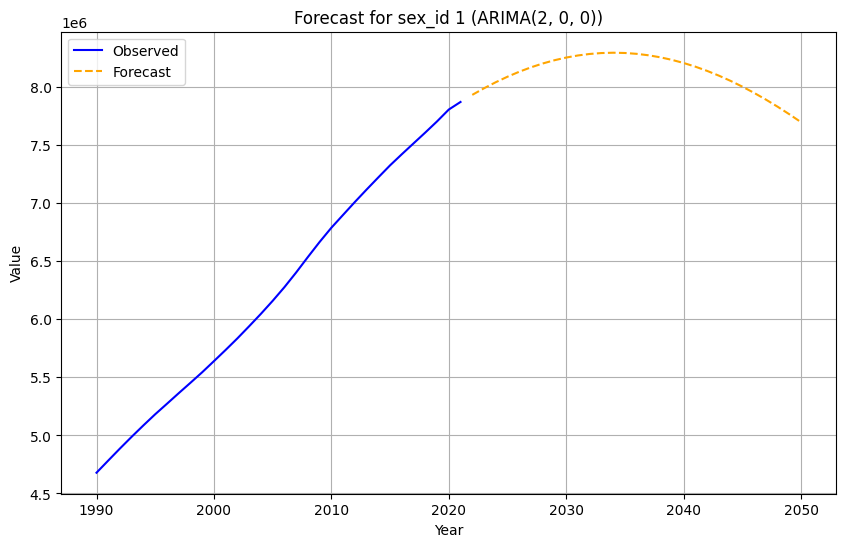

In [34]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import itertools
import numpy as np

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("Series is not stationary. Consider differencing.")
    else:
        print("Series is stationary.")

# Grid search for ARIMA parameters
def optimize_arima(series, p_range, d_range, q_range):
    best_aic = float("inf")
    best_order = None
    best_model = None

    for p, d, q in itertools.product(p_range, d_range, q_range):
        try:
            model = ARIMA(series, order=(p, d, q))
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = (p, d, q)
                best_model = model_fit
        except Exception as e:
            continue

    print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")
    return best_model, best_order

# Example for one sex_id
sex_id = 1
sex_data = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
sex_data = sex_data.sort_values(by='year').set_index('year')

# Check stationarity
check_stationarity(sex_data['val'])

# Optimize ARIMA parameters
p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)

best_model, best_order = optimize_arima(sex_data['val'], p_range, d_range, q_range)

# Forecast using the best model
forecast_years = range(sex_data.index.max() + 1, 2051)
forecast = best_model.forecast(steps=len(forecast_years))

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sex_data.index, sex_data['val'], label='Observed', color='blue')
plt.plot(forecast_years, forecast, label='Forecast', color='orange', linestyle='--')
plt.title(f'Forecast for sex_id {sex_id} (ARIMA{best_order})')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No s

sex_df.index.max() =  2021
2022    7.973278e+06
2023    8.075744e+06
2024    8.178185e+06
2025    8.280601e+06
2026    8.382990e+06
Name: predicted_mean, dtype: float64


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No s

sex_df.index.max() =  2021
2022    7.037685e+06
2023    7.129539e+06
2024    7.221386e+06
2025    7.313226e+06
2026    7.405059e+06
Name: predicted_mean, dtype: float64
sex_df.index.max() =  2021
2022    1.501110e+07
2023    1.520556e+07
2024    1.539998e+07
2025    1.559436e+07
2026    1.578870e+07
Name: predicted_mean, dtype: float64
sex_df.index.max() =  2021
2022    188.641898
2023    188.412963
2024    188.248201
2025    188.129623
2026    188.044284
Name: predicted_mean, dtype: float64
sex_df.index.max() =  2021
2022    166.364501
2023    166.337433
2024    166.316793
2025    166.301054
2026    166.289054
Name: predicted_mean, dtype: float64
sex_df.index.max() =  2021
2022    177.552449
2023    177.401869
2024    177.287092
2025    177.199605
2026    177.132920
Name: predicted_mean, dtype: float64


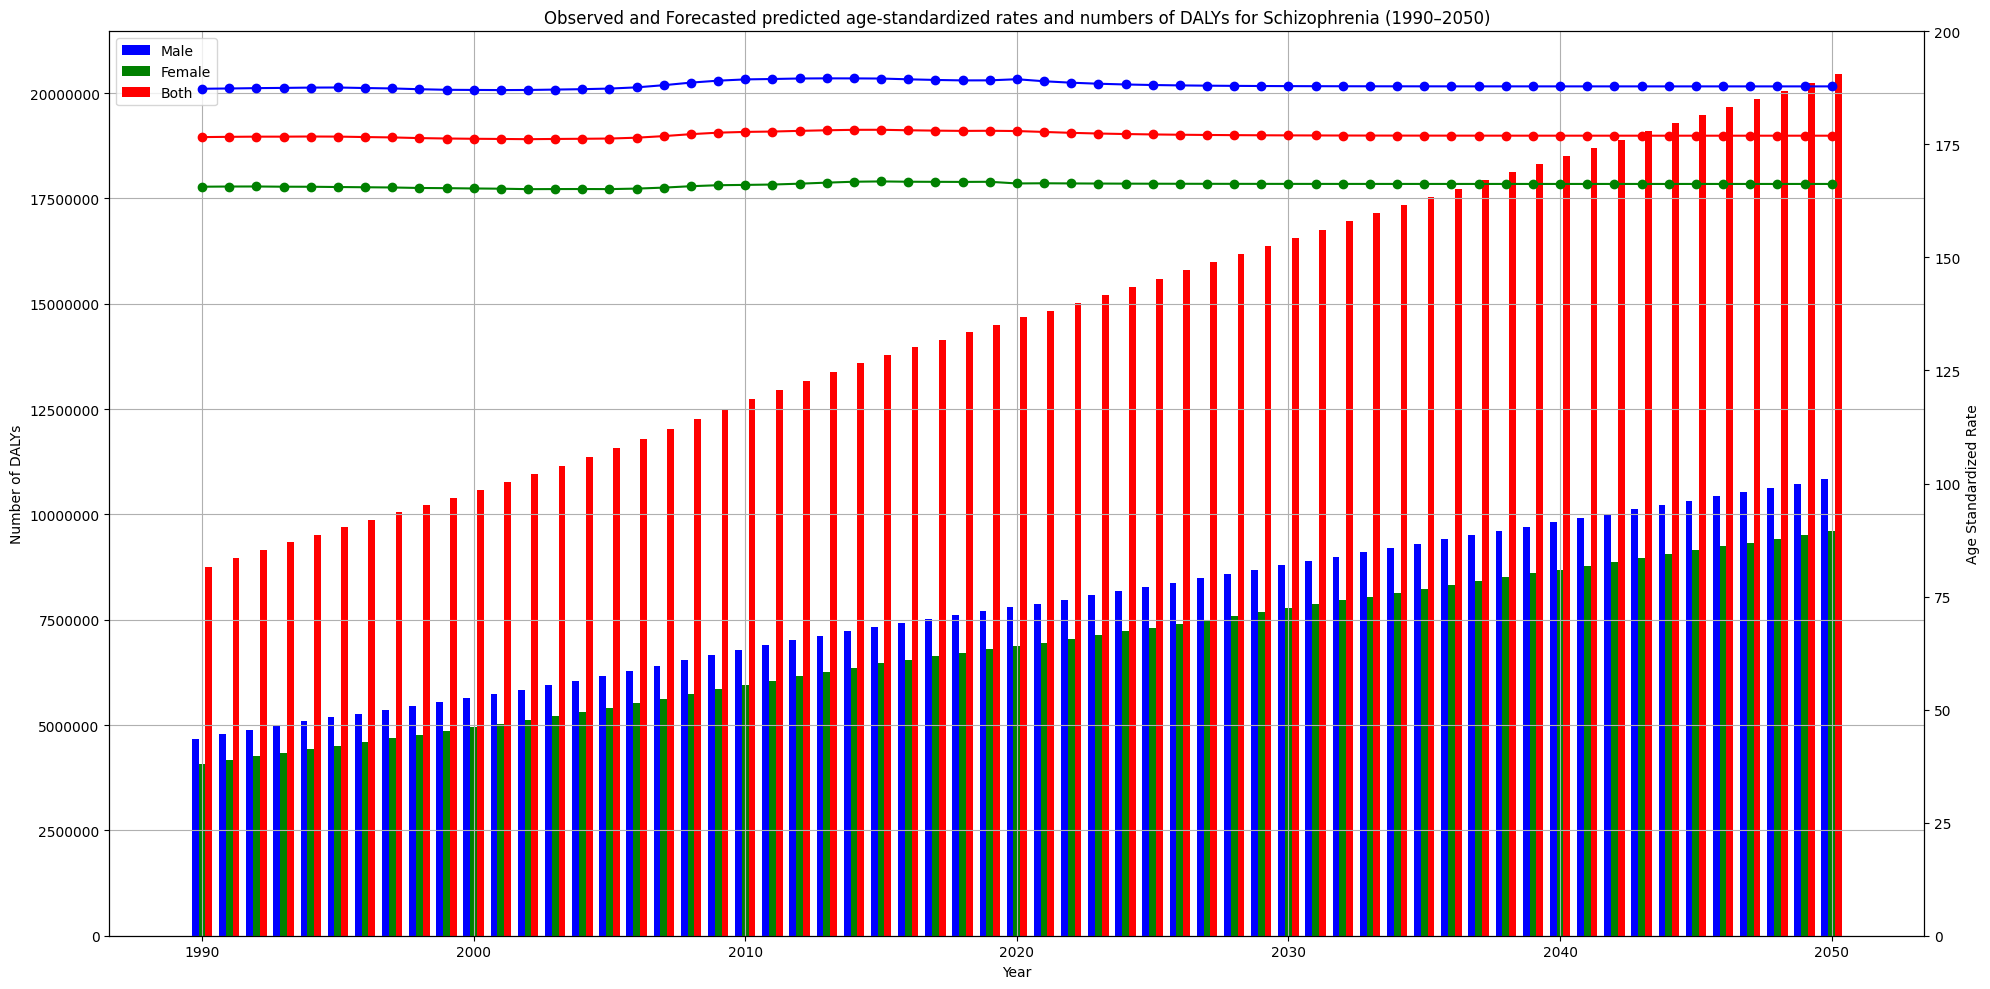

In [65]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]

# Full year range
all_years = list(range(1990, 2051))

# Store observed and forecasted data
full_data_bar = {}
full_data_line = {}

# Define colors and label mapping
sex_ids = sorted(df['sex_id'].unique())  # e.g., [1, 2, 3]
colors = ['blue', 'green', 'red']
sex_labels = {1: 'Male', 2: 'Female', 3: 'Both'}

# Number of DALYs
for i, sex_id in enumerate(sex_ids):
    sex_df = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
    sex_df = sex_df.sort_values(by='year').set_index('year')

    # Fit ARIMA
    model = ARIMA(sex_df['val'], order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast to 2050
    forecast_years = range(sex_df.index.max() + 1, 2051)
    print("sex_df.index.max() = ", sex_df.index.max())
    forecast = model_fit.forecast(steps=len(forecast_years))
    forecast.index = forecast_years

    print(forecast.head())
    # Merge observed and forecast
    forecast_series = pd.Series(forecast, index=forecast_years)
    full_series = sex_df['val'].reindex(all_years[:len(sex_df.index)])
    full_series = pd.concat([full_series, forecast_series])
    full_data_bar[sex_id] = full_series



file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 22]


# Age-standardized rates
for i, sex_id in enumerate(sex_ids):
    sex_df = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
    sex_df = sex_df.sort_values(by='year').set_index('year')

    # Fit ARIMA
    model = ARIMA(sex_df['val'], order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast to 2050
    forecast_years = range(sex_df.index.max() + 1, 2051)
    print("sex_df.index.max() = ", sex_df.index.max())
    forecast = model_fit.forecast(steps=len(forecast_years))
    forecast.index = forecast_years

    print(forecast.head())
    # Merge observed and forecast
    forecast_series = pd.Series(forecast, index=forecast_years)
    full_series = sex_df['val'].reindex(all_years[:len(sex_df.index)])
    full_series = pd.concat([full_series, forecast_series])
    full_data_line[sex_id] = full_series


# Plotting grouped bar chart
fig, ax = plt.subplots(figsize=(20, 10))
bar_width = 0.25
years = np.array(all_years)

for i, sex_id in enumerate(sex_ids):
    data = full_data_bar[sex_id]
    offset = (i - len(sex_ids)/2 + 0.5) * bar_width  # Center the bars
    label = sex_labels.get(sex_id, f'Sex ID {sex_id}')
    ax.bar(years + offset, data.values, width=bar_width, label=label, color=colors[i % len(colors)])

ax2 = ax.twinx()  # Create a second y-axis for the line plot
for i, sex_id in enumerate(sex_ids):
    data = full_data_line[sex_id]
    offset = (i - len(sex_ids)/2 + 0.5) * bar_width  # Center the bars
    label = sex_labels.get(sex_id, f'Sex ID {sex_id}')
    ax2.plot(years, data.values, label=label, color=colors[i % len(colors)])
    ax2.scatter(years, data.values, color=colors[i % len(colors)])



ax.set_title('Observed and Forecasted predicted age-standardized rates and numbers of DALYs for Schizophrenia (1990–2050)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of DALYs')
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')  # Disable scientific notation
ax2.set_ylim(0, 200) # Set y-axis limits for the line plot
ax2.set_ylabel('Age Standardized Rate')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

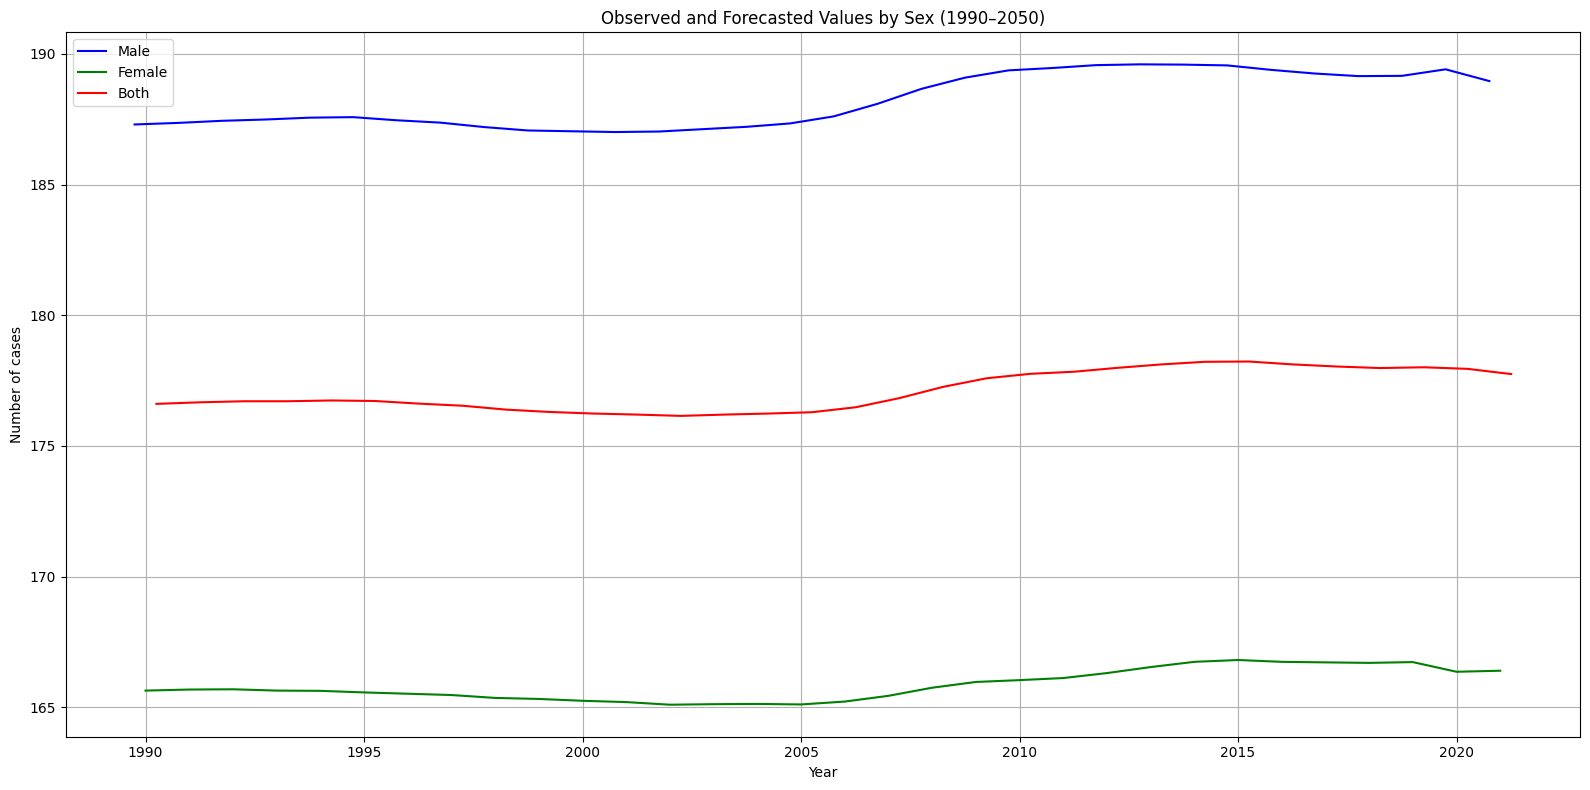

In [42]:

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 22]

# Full year range
all_years = list(range(1990, 2051))

# Store observed and forecasted data
full_data = {}

# Define colors and label mapping
sex_ids = sorted(df['sex_id'].unique())  # e.g., [1, 2, 3]
colors = ['blue', 'green', 'red']
sex_labels = {1: 'Male', 2: 'Female', 3: 'Both'}

for i, sex_id in enumerate(sex_ids):
    sex_df = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
    sex_df = sex_df.sort_values(by='year').set_index('year')

    # Fit ARIMA
    model = ARIMA(sex_df['val'], order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast to 2050
    forecast_years = range(sex_df.index.max() + 1, 2051)
    forecast = model_fit.forecast(steps=len(forecast_years))

    # Merge observed and forecast
    full_series = sex_df['val'].reindex(all_years)
    full_series.update(pd.Series(forecast, index=forecast_years))

    full_data[sex_id] = full_series

# Plotting grouped bar chart
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.25
years = np.array(all_years)

for i, sex_id in enumerate(sex_ids):
    data = full_data[sex_id]
    offset = (i - len(sex_ids)/2 + 0.5) * bar_width  # Center the bars
    label = sex_labels.get(sex_id, f'Sex ID {sex_id}')
    ax.plot(years + offset, data.values, label=label, color=colors[i % len(colors)])

ax.set_title('Observed and Forecasted Values by Sex (1990–2050)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of cases')
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')  # Disable scientific notation
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()
